In [1]:
import os
import pandas as pd
import numpy as np
import glob 
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rs

In [6]:
fayl_link=os.path.join(r"C:\Users\hp\html\Sales_Data\Sales_Data\*")

In [8]:
links=glob.glob(fayl_link)

In [9]:
data=pd.concat(map(pd.read_csv,links))

# Data overview

In [412]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [413]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [414]:
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [415]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# Data Cleaning

In [416]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [324]:
data[data.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
data[data["Product"].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.dropna(inplace=True)

In [327]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
data["Price Each"]=pd.to_numeric(data["Price Each"],errors="coerce")
data["Order ID"]=pd.to_numeric(data["Order ID"],errors="coerce")
data["Quantity Ordered"]=pd.to_numeric(data["Quantity Ordered"],errors="coerce")
data["Order Date"]=pd.to_datetime(data["Order Date"],errors="coerce")


In [14]:
data.isnull().sum()

Order ID            900
Product             545
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    545
dtype: int64

In [15]:
data.dropna(inplace=True)

In [23]:
data["City"]=data["Purchase Address"].apply(lambda x : x.split(",")[1])
data["Earning"]=data["Price Each"]*data["Quantity Ordered"]
data["Sales_Hour"]=data["Order Date"].dt.time

In [55]:
# Duplicates Drop
data.drop_duplicates(inplace=True)

In [ ]:
##LOCAL OUTLIER FACTOR

In [332]:
data.dtypes

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
City                        object
Earning                    float64
dtype: object

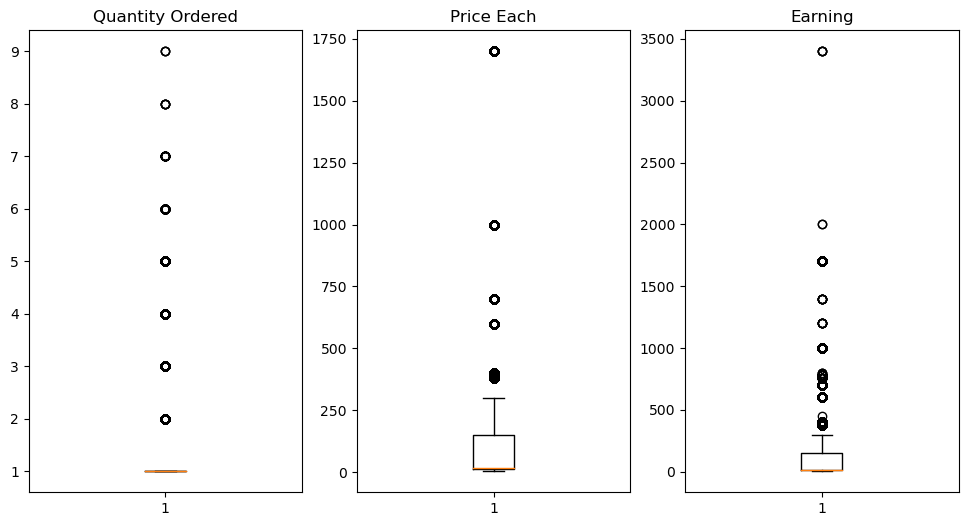

In [270]:
float_columns = data.select_dtypes("float").drop(["Order ID"], axis=1).columns
fig, ax = plt.subplots(nrows=1, ncols=len(float_columns), figsize=(12, 6))
k = 0
for column in float_columns:
    ax[k].boxplot(data[column])
    ax[k].set_title(column)
    k += 1

In [283]:
from sklearn.neighbors import LocalOutlierFactor
loc_data=data[data.select_dtypes("float").drop(["Order ID"], axis=1).columns]
clf=LocalOutlierFactor(n_neighbors=15,contamination=0.1,n_jobs=-1)
clf.fit_predict(loc_data)

array([1, 1, 1, ..., 1, 1, 1])

In [310]:
score=clf.negative_outlier_factor_
np.sort(score)[:100]

array([-1.12135750e+13, -1.12135750e+13, -1.12135750e+13, -1.12135750e+13,
       -3.35633526e+12, -3.35633526e+12, -1.50003333e+12, -6.33821839e+11,
       -6.33821839e+11, -6.33821839e+11, -6.33821839e+11, -6.33821839e+11,
       -6.33821839e+11, -6.33821839e+11, -6.29129150e+11, -6.29129150e+11,
       -6.29129150e+11, -6.29129150e+11, -6.29129150e+11, -6.29129150e+11,
       -6.29129150e+11, -4.66760000e+11, -4.66760000e+11, -2.98142397e+10,
       -2.98142397e+10, -2.98142397e+10, -2.98142397e+10, -2.98142397e+10,
       -2.98142397e+10, -2.98142397e+10, -2.98142397e+10, -2.98142397e+10,
       -2.98142397e+10, -2.98142397e+10, -2.98142397e+10, -2.98142397e+10,
       -2.98142397e+10, -1.71933437e+10, -1.71933437e+10, -1.71933437e+10,
       -1.71933437e+10, -1.71933437e+10, -1.69223733e+10, -1.69223733e+10,
       -1.69223733e+10, -1.57001694e+10, -1.57001694e+10, -5.09175953e+01,
       -3.98541005e+01, -3.98541005e+01, -3.98541005e+01, -3.98541005e+01,
       -3.98541005e+01, -

In [336]:
normalvalue=-2.98142397e+10
data=data[score>normalvalue]

In [342]:
# Burdaki meqsedimiz outlierlari ozune en yaxin olan serhedde bearber goturmekdir 
# Q1=data["Price Each"].quantile(0.25)
# Q3=data["Price Each"].quantile(0.75)
# IQR=Q3-Q1
# upper_band=Q3+1.5*IQR
# lower_band=Q1-1.5*IQR
# upper_index=data[(data["Price Each"]>upper_band)]
# data[((data["Price Each"]>lower_band)|(data["Price Each"]<upper_band))]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Earning
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99
...,...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,8.97
11682,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,700.00
11683,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,700.00
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,379.99


------------------------------------------------------------------------------------------------

{'whiskers': [<matplotlib.lines.Line2D at 0x1e789274e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1e7892562e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e789274ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7892649d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e789264a90>],
 'means': []}

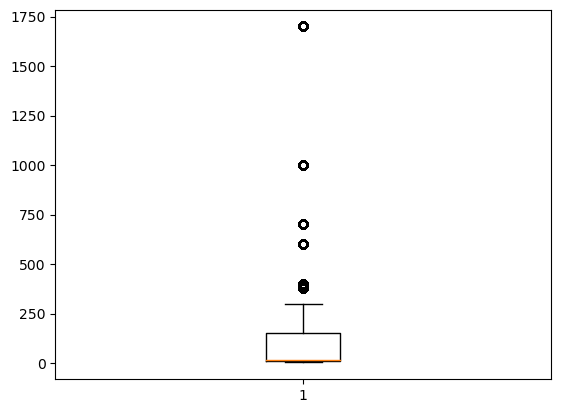

In [345]:
# plt.boxplot(data["Price Each"])

In [356]:
# data["Price Each"][(data["Price Each"]>upper_band)]=upper_band
# data["Price Each"][(data["Price Each"]>upper_band)]

C:\Users\hp\AppData\Local\Temp\ipykernel_11092\4093597346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price Each"][(data["Price Each"]>upper_band)]=upper_band
C:\Users\hp\AppData\Local\Temp\ipykernel_11092\4093597346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Price Each"][(data["Price Each"]>upper_band)]=upper_band


# Viziualization

array([[<AxesSubplot:title={'center':'Order ID'}>,
        <AxesSubplot:title={'center':'Quantity Ordered'}>],
       [<AxesSubplot:title={'center':'Price Each'}>,
        <AxesSubplot:title={'center':'Order Date'}>],
       [<AxesSubplot:title={'center':'Earning'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 1000x3000 with 0 Axes>

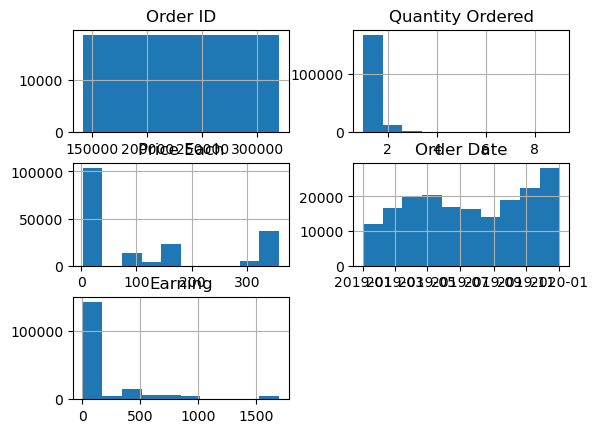

In [364]:
plt.figure(figsize=(10,30))
data.hist()

In [442]:
data.groupby(["Product"])["Earning"].sum()

Product
20in Monitor                   454148.71
27in 4K Gaming Monitor        2435097.56
27in FHD Monitor              1132424.50
34in Ultrawide Monitor        2355558.01
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Apple Airpods Headphones      2349150.00
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Google Phone                  3319200.00
LG Dryer                       387600.00
LG Washing Machine             399600.00
Lightning Charging Cable       347094.15
Macbook Pro Laptop            8037600.00
ThinkPad Laptop               4129958.70
USB-C Charging Cable           286501.25
Vareebadd Phone                827200.00
Wired Headphones               246478.43
iPhone                        4794300.00
Name: Earning, dtype: float64

In [441]:

order = data.groupby(["Product"])["Earning"].sum().sort_values(ascending=False).index
order

Index(['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone',
       '27in 4K Gaming Monitor', '34in Ultrawide Monitor',
       'Apple Airpods Headphones', 'Flatscreen TV',
       'Bose SoundSport Headphones', '27in FHD Monitor', 'Vareebadd Phone',
       '20in Monitor', 'LG Washing Machine', 'LG Dryer',
       'Lightning Charging Cable', 'USB-C Charging Cable', 'Wired Headphones',
       'AA Batteries (4-pack)', 'AAA Batteries (4-pack)'],
      dtype='object', name='Product')

Text(0.5, 0, 'Earning')

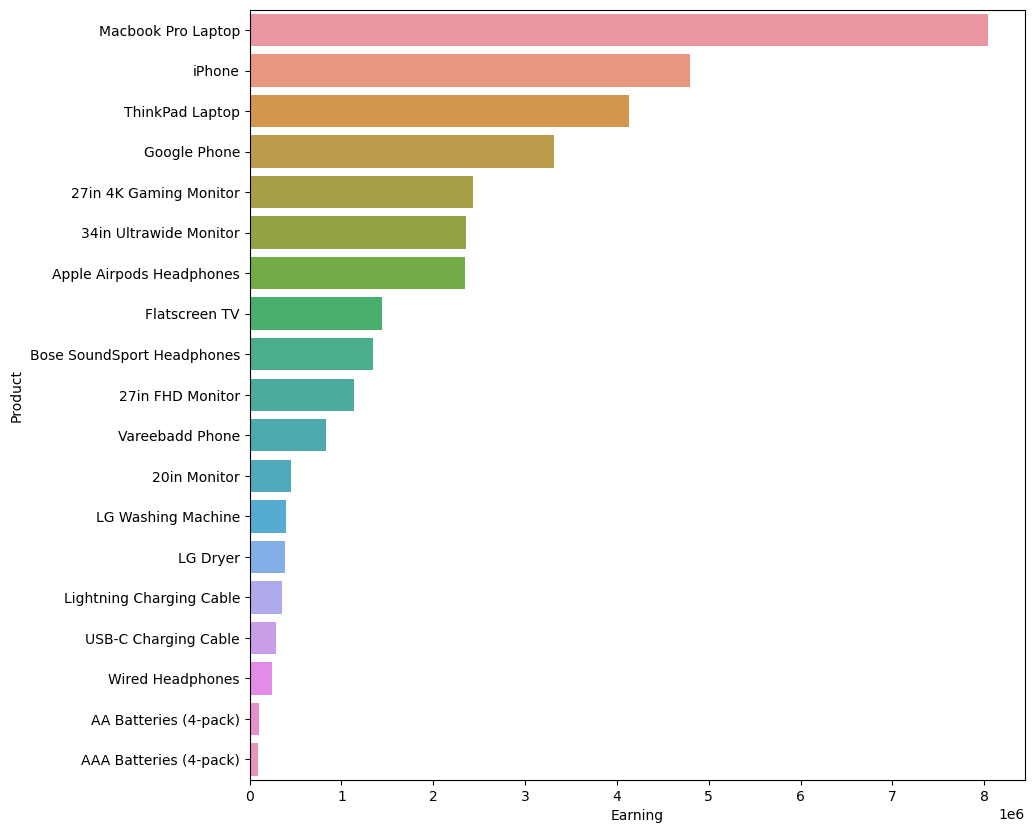

In [444]:
plt.figure(figsize=(10,10))
sns.barplot(y=data.groupby(["Product"])["Earning"].sum().index,x=data.groupby(["Product"])["Earning"].sum().values,order=order)
plt.xlabel("Earning")

In [457]:
order=data.groupby(["Product"])["Quantity Ordered"].sum().sort_values(ascending=False)[:5].index
order

Index(['AAA Batteries (4-pack)', 'AA Batteries (4-pack)',
       'USB-C Charging Cable', 'Lightning Charging Cable', 'Wired Headphones'],
      dtype='object', name='Product')

<AxesSubplot:xlabel='Product'>

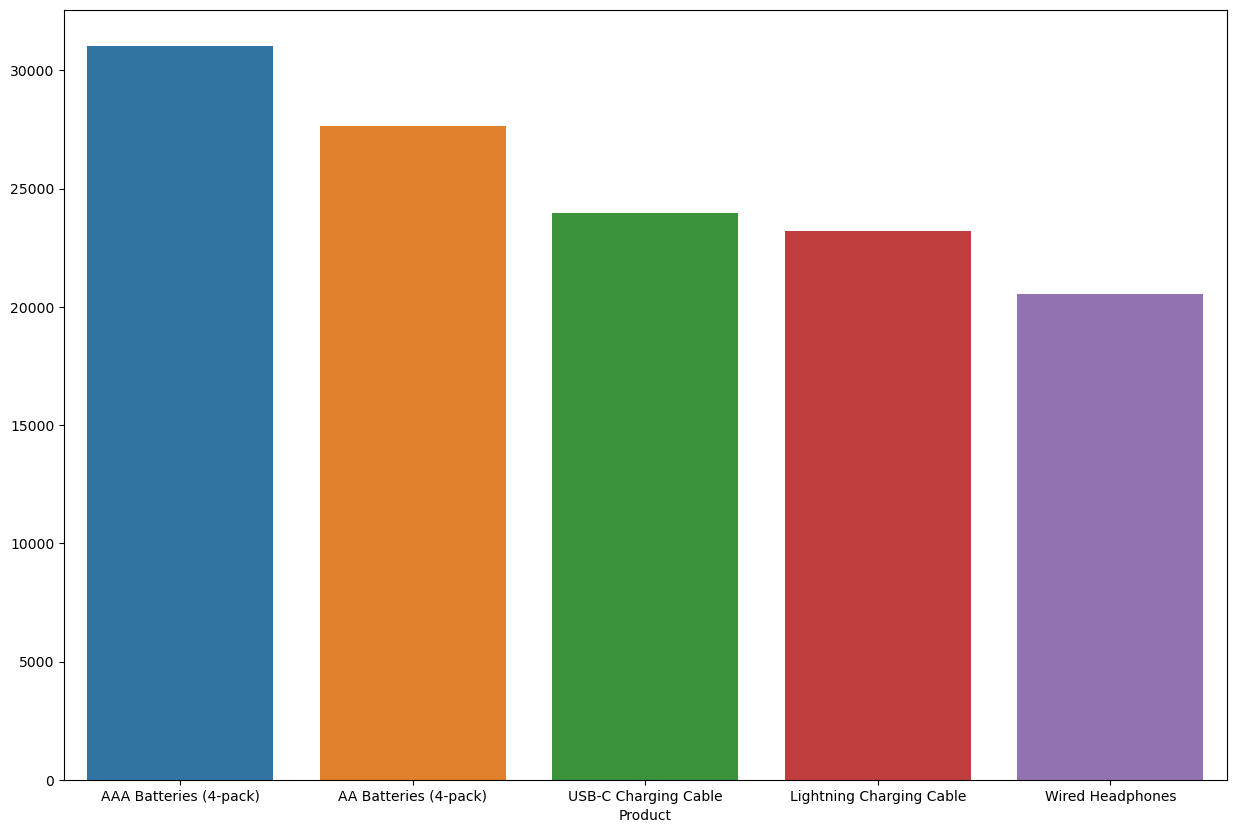

In [467]:
plt.figure(figsize=(15,10))
sns.barplot(x=data.groupby(["Product"])["Quantity Ordered"].sum().index,y=data.groupby(["Product"])["Quantity Ordered"].sum().values,order=order)


In [489]:
order=data.groupby(data["Order Date"].dt.strftime("%B"))["Earning"].sum().sort_values(ascending=False).index
data.groupby(data["Order Date"].dt.strftime("%B"))["Earning"].sum()

Order Date
April        3390670.24
August       2244467.88
December     4613443.34
February     2202022.42
January      1822256.73
July         2647775.76
June         2577802.26
March        2807100.38
May          3152606.75
November     3199603.20
October      3736726.88
September    2097560.13
Name: Earning, dtype: float64

<AxesSubplot:ylabel='Order Date'>

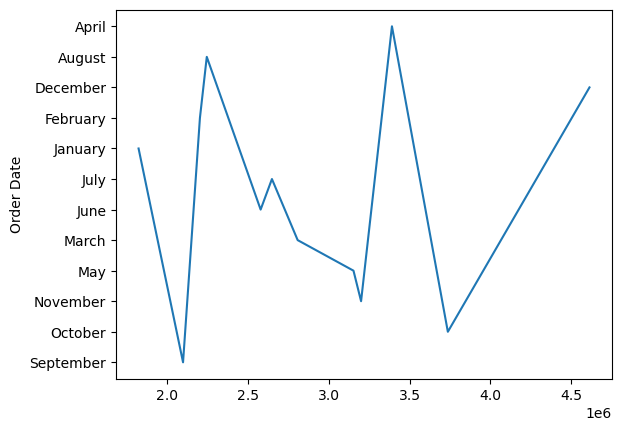

In [20]:
sns.lineplot(x=data.groupby(data["Order Date"].dt.strftime("%B"))["Earning"].sum().values,
             y=data.groupby(data["Order Date"].dt.strftime("%B"))["Earning"].sum().index)

([<matplotlib.patches.Wedge at 0x2345768f2b0>,
 [Text(0.548749121687638, 0.9533490449185157, ' San Francisco'),
  Text(-1.0330697257508317, 0.3778451293018105, ' Los Angeles'),
  Text(-0.6607975610415932, -0.8794012641118286, ' New York City'),
  Text(0.4343614411731196, -1.0106087959354058, ' Boston'),
  Text(1.0337588028889415, -0.37595576528312835, ' Atlanta')],
 [Text(0.2993177027387116, 0.5200085699555539, '33.38%'),
  Text(-0.5634925776822717, 0.206097343255533, '22.09%'),
  Text(-0.3604350332954144, -0.4796734167882701, '18.56%'),
  Text(0.2369244224580652, -0.5512411614193122, '14.87%'),
  Text(0.5638684379394227, -0.20506678106352452, '11.10%')])

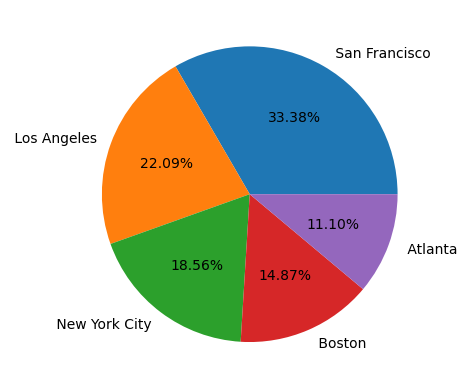

In [38]:
data.groupby("City")["Quantity Ordered"].count().sort_values(ascending=False)[:5]
plt.pie(x=data.groupby("City")["Quantity Ordered"].count().sort_values(ascending=False)[:5].values,
            labels=data.groupby("City")["Quantity Ordered"].count().sort_values(ascending=False)[:5].index,autopct="%.2f%%")

<AxesSubplot:xlabel='City', ylabel='Earning'>

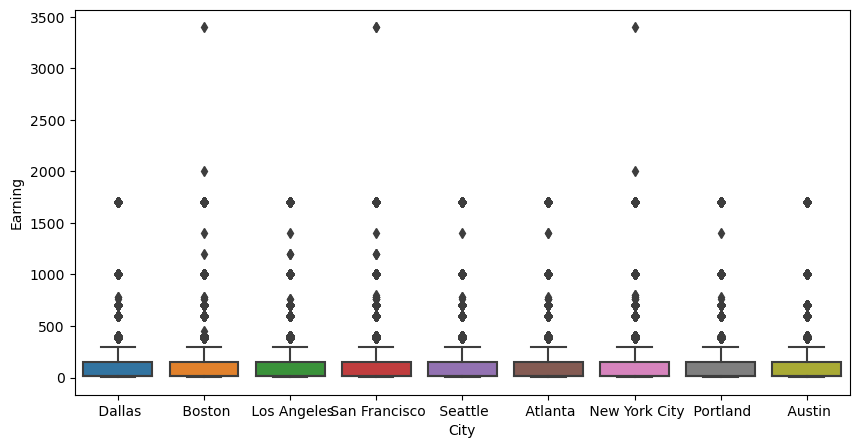

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data["City"],y=data["Earning"])

In [31]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Earning,Sales_Hour
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,23.90,08:46:00
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,99.99,22:30:00
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00,14:38:00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99,14:38:00
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99,09:27:00
...,...,...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,8.97,20:56:00
11682,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,700.00,16:00:00
11683,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,700.00,07:39:00
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,379.99,17:30:00


Text(0.5, 0, 'Order Hours')

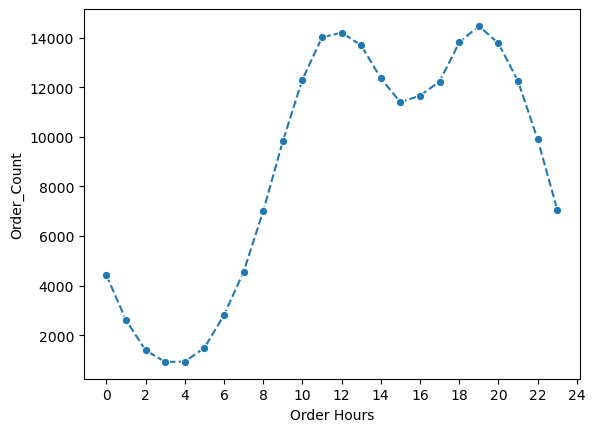

In [86]:
group=data.groupby(data["Order Date"].dt.hour)["Quantity Ordered"].sum()
sns.lineplot(x=group.index,y=group.values, marker='o', linestyle='dashed',palette="#B0C4DE")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15)) 
plt.ylabel("Order_Count")
plt.xlabel("Order Hours")
